In [ ]:
# Project: Regression Modeling and Performance Evaluation
# Course: MSCS-634-B01 (Summer 2025)
# Author: Shashwat Baral
# Date: July 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score

# Set styles
sns.set(style="whitegrid")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving mobile phone usage .csv to mobile phone usage .csv


In [3]:
df = pd.read_csv('mobile phone usage .csv')
df.columns = df.columns.str.strip()
print("Shape:", df.shape)
df.head()

Shape: (225, 6)


,ï»¿name,slug,value,date_of_information,ranking,region
0,China,china,"1,810,000,000",2023,1,East and Southeast Asia
1,India,india,"1,140,000,000",2022,2,South Asia
2,United States,united-states,"386,000,000",2023,3,North America
3,Indonesia,indonesia,"352,000,000",2023,4,East and Southeast Asia
4,Russia,russia,"245,000,000",2022,5,Central Asia


In [4]:
# ----------------------------
# Step 3: Data Preprocessing
# ----------------------------

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with any missing values (or you can choose imputation if needed)
df.dropna(inplace=True)

# Convert categorical variables using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

# Display data types and shape
print("Encoded Shape:", df_encoded.shape)
df_encoded.head()


Missing values per column:
ï»¿name                0
slug                   0
value                  0
date_of_information    0
ranking                0
region                 0
dtype: int64
Encoded Shape: (225, 670)


,date_of_information,ranking,ï»¿name_Albania,ï»¿name_Algeria,ï»¿name_American Samoa,ï»¿name_Andorra,ï»¿name_Angola,ï»¿name_Anguilla,ï»¿name_Antigua and Barbuda,ï»¿name_Argentina,...,"value_992,000",region_Australia and Oceania,region_Central America and the Caribbean,region_Central Asia,region_East and Southeast Asia,region_Europe,region_Middle East,region_North America,region_South America,region_South Asia
0,2023,1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2022,2,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,2023,3,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,2023,4,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,2022,5,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [6]:
# ----------------------------
# Step 4: Feature Engineering
# ----------------------------

# Convert 'value' column to numeric
df['value'] = df['value'].replace(',', '', regex=True).astype(float)

# Drop non-predictive columns if needed (e.g., slug, name, etc.)
df = df.drop(columns=['slug', 'ï»¿name'])  # Drop unnecessary columns

# One-Hot Encode remaining categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Set target and features
target = 'value'
X = df_encoded.drop(columns=[target])
y = df_encoded[target]

# Check correlation with target
corr = df_encoded.corr()[target].sort_values(ascending=False)
print("Top Correlated Features with Target:\n", corr.head(10))

# Optional: Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Top Correlated Features with Target:
 value                             1.000000
region_East and Southeast Asia    0.239464
region_South Asia                 0.208683
region_North America              0.074037
date_of_information               0.072593
region_Central Asia               0.000411
region_South America             -0.001658
region_Middle East               -0.019866
region_Australia and Oceania     -0.077699
region_Europe                    -0.081960
Name: value, dtype: float64


In [8]:
# ----------------------------
# Step 5: Train-Test Split
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [10]:
# ----------------------------
# Step 6: Build Regression Models
# ----------------------------

# 1. Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 3. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [11]:
# ----------------------------
# Step 7: Evaluate Models
# ----------------------------
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name}:\n - RMSE: {rmse:.2f}\n - R²: {r2:.3f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Ridge Regression", y_test, y_pred_ridge)
evaluate_model("Lasso Regression", y_test, y_pred_lasso)


Linear Regression:
 - RMSE: 36692060.13
 - R²: 0.042

Ridge Regression:
 - RMSE: 36179507.56
 - R²: 0.068

Lasso Regression:
 - RMSE: 36692059.86
 - R²: 0.042



In [12]:
# ----------------------------
# Step 8: Cross-Validation
# ----------------------------
cv = KFold(n_splits=5, shuffle=True, random_state=1)

lr_scores = cross_val_score(lr, X_scaled, y, scoring='r2', cv=cv)
ridge_scores = cross_val_score(ridge, X_scaled, y, scoring='r2', cv=cv)
lasso_scores = cross_val_score(lasso, X_scaled, y, scoring='r2', cv=cv)

print(f"Cross-Validation R² Scores (mean):")
print(f" - Linear Regression: {lr_scores.mean():.3f}")
print(f" - Ridge Regression : {ridge_scores.mean():.3f}")
print(f" - Lasso Regression : {lasso_scores.mean():.3f}")


Cross-Validation R² Scores (mean):
 - Linear Regression: -0.528
 - Ridge Regression : -0.511
 - Lasso Regression : -0.528


/tmp/ipython-input-13-951212097.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=rmse_values, palette='Blues_r')


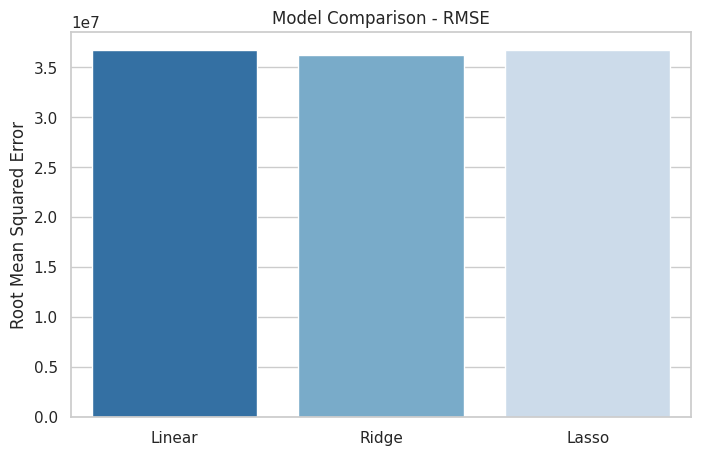

In [13]:
# ----------------------------
# Step 9: Visualize Model Performance
# ----------------------------
models = ['Linear', 'Ridge', 'Lasso']
rmse_values = [
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),
    np.sqrt(mean_squared_error(y_test, y_pred_ridge)),
    np.sqrt(mean_squared_error(y_test, y_pred_lasso))
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=rmse_values, palette='Blues_r')
plt.title("Model Comparison - RMSE")
plt.ylabel("Root Mean Squared Error")
plt.show()
